In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [11]:
# Load Data
df = pd.read_csv("Datasets/DailyDelhiClimateTrain.csv")
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

In [12]:
# Choose target variable
ts = df['humidity']

In [13]:
# Choose period
period = 365  # annual cycle
print(f"Using period = {period}")

Using period = 365


In [ ]:
# Seasonal Decomposition
result = seasonal_decompose(ts, model='additive', period=period, extrapolate_trend='freq')

In [18]:
# Results
df_decomposed = pd.DataFrame({
    'trend': result.trend,
    'seasonal': result.seasonal,
    'residual': result.resid
}).dropna()
print(df_decomposed.head(10))

                trend   seasonal   residual
date                                       
2013-01-01  67.629164  19.894489  -3.023653
2013-01-02  67.617534  27.385095  -3.002629
2013-01-03  67.605904  20.016357  -0.622261
2013-01-04  67.594274  16.686682 -12.947622
2013-01-05  67.582644  21.369724  -2.119035
2013-01-06  67.571014  20.517730  -5.288744
2013-01-07  67.559384  18.853971  -7.813355
2013-01-08  67.547754  15.816053 -19.649522
2013-01-09  67.536124   7.901232 -24.187356
2013-01-10  67.524494  11.618297 -17.142791


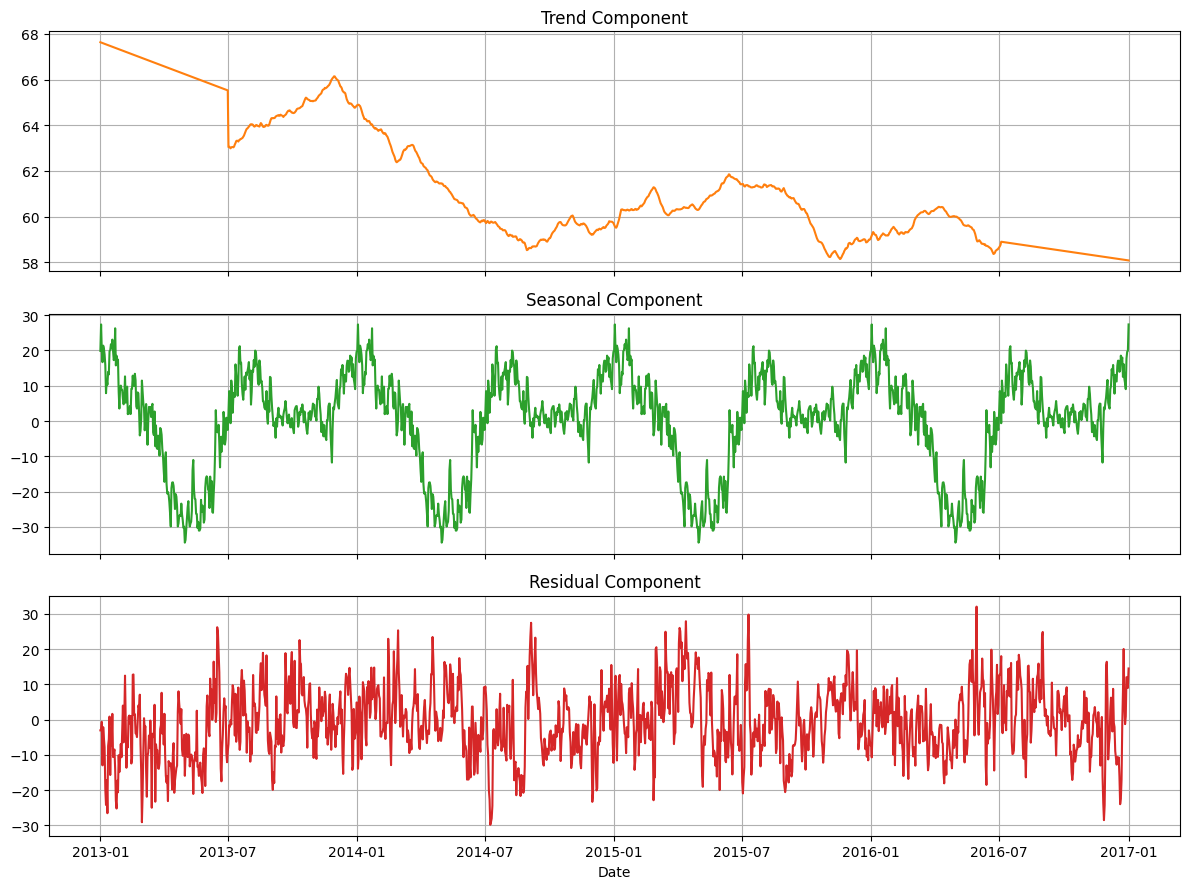

In [22]:
# Plot
fig, axes = plt.subplots(3, 1, figsize=(12, 9), sharex=True)
axes[0].plot(result.trend, color='tab:orange')
axes[0].set_title('Trend Component')
axes[0].grid(True)
axes[1].plot(result.seasonal, color='tab:green')
axes[1].set_title('Seasonal Component')
axes[1].grid(True)
axes[2].plot(result.resid, color='tab:red')
axes[2].set_title('Residual Component')
axes[2].grid(True)
plt.xlabel('Date')
plt.tight_layout()
plt.show()